# Data Analytics of financial data

**Data Summary:**
This dataset contains financial information for the top 500 companies in India, including their market capitalization and quarterly sales.EDA will be performed to uncover trands, patterns which is crucial for understanding the landscape.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# load data
df = pd.read_csv('Financial.csv')
df.head(10)

,Name,Mar Cap - Crore,Sales Qtr - Crore,Market_Cap_Category,Sales_Qrt_Category
0,Reliance Inds.,583436.72,99810.00,Large Cap,High Sales
1,TCS,563709.84,30904.00,Large Cap,High Sales
2,HDFC Bank,482953.59,20581.27,Large Cap,High Sales
3,ITC,320985.27,9772.02,Large Cap,High Sales
4,H D F C,289497.37,16840.51,Large Cap,High Sales
5,Hind. Unilever,288265.26,8590.00,Large Cap,High Sales
6,Maruti Suzuki,263493.81,19283.20,Large Cap,High Sales
7,Infosys,248320.35,17794.00,Large Cap,High Sales
8,O N G C,239981.50,22995.88,Large Cap,High Sales
9,St Bk of India,232763.33,57014.08,Large Cap,High Sales


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 459 non-null    object 
 1   Mar Cap - Crore      459 non-null    float64
 2   Sales Qtr - Crore    459 non-null    float64
 3   Market_Cap_Category  459 non-null    object 
 4   Sales_Qrt_Category   459 non-null    object 
dtypes: float64(2), object(3)
memory usage: 18.1+ KB


In [15]:
# shape of data
df.shape

(459, 5)

In [4]:
# columns 
df.columns

Index(['Name', 'Mar Cap - Crore', 'Sales Qtr - Crore', 'Market_Cap_Category',
       'Sales_Qrt_Category'],
      dtype='object')

In [5]:
# from  the above, there is no missing available, 
# to confirm
df.isna().sum()

Name                   0
Mar Cap - Crore        0
Sales Qtr - Crore      0
Market_Cap_Category    0
Sales_Qrt_Category     0
dtype: int64

In [6]:
# check for duplicates
df.duplicated().sum()

0

There isn't any duplicates in the data

In [7]:
# summary of data
df.describe()

,Mar Cap - Crore,Sales Qtr - Crore
count,459.000000,459.000000
mean,28870.974139,3807.789412
std,60557.081792,9989.449987
min,3017.070000,0.000000
25%,4942.815000,534.910000
50%,10442.090000,1137.170000
75%,24707.320000,2730.195000
max,583436.720000,110666.930000


In [8]:
# unique names
df['Name'].nunique()

459

Text(0, 0.5, 'Frequency')

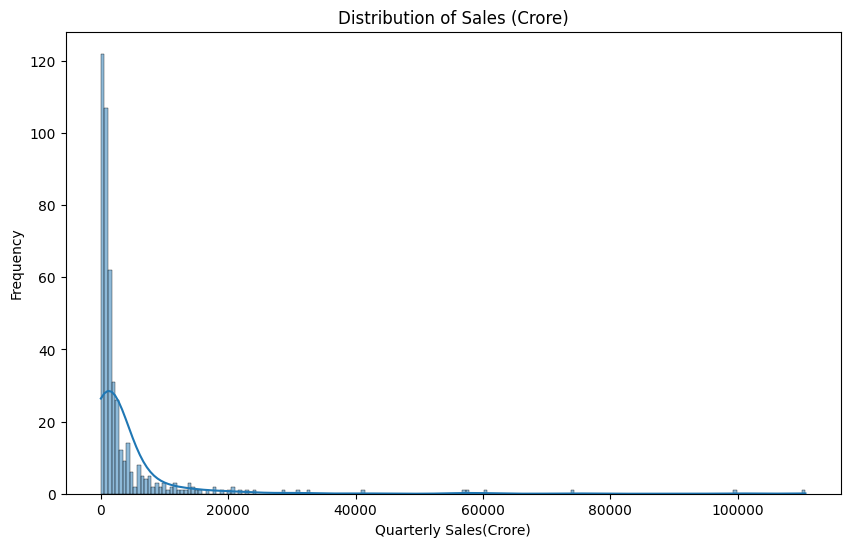

In [9]:
# distribution of Sales Qtr
plt.figure(figsize=(10,6))
sns.histplot(df['Sales Qtr - Crore'], kde=True)
plt.title('Distribution of Sales (Crore)')
plt.xlabel('Quarterly Sales(Crore)')
plt.ylabel('Frequency')

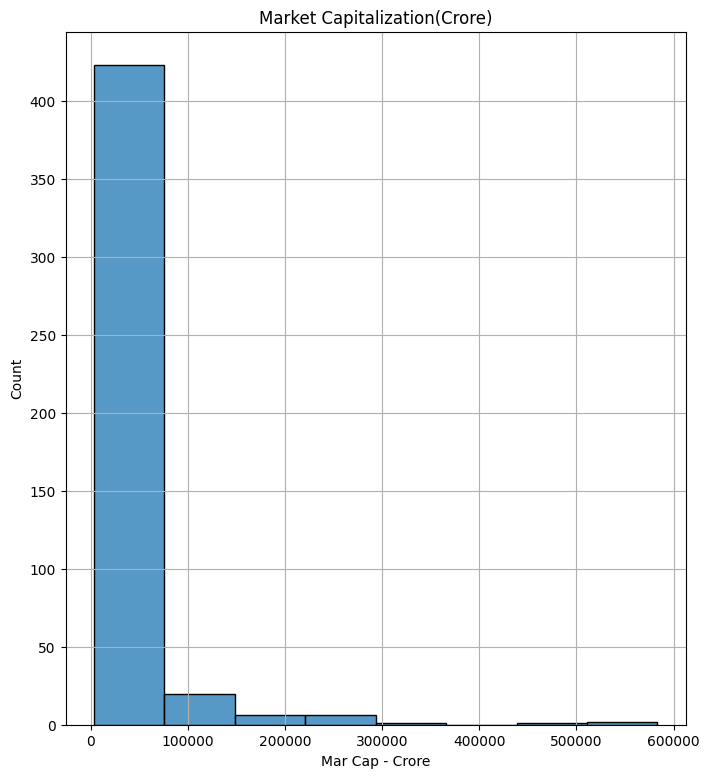

In [10]:
# Market Capitalozation 
plt.figure(figsize=(8,9))
sns.histplot(df['Mar Cap - Crore'], bins=8)
plt.title('Market Capitalization(Crore)')
plt.grid(True)

In [11]:
# find Market Cap and Sales Qtr in each name
df.groupby('Name').mean(numeric_only=True).style.background_gradient(cmap='plasma')

,Mar Cap - Crore,Sales Qtr - Crore
Name,,
3M India,23101.190000,645.770000
A B B,31983.330000,2779.400000
ACC,30803.680000,3494.240000
AIA Engg.,13593.350000,572.160000
APL Apollo,4775.030000,1314.380000
AU Small Finance,16453.670000,464.170000
Abbott India,11924.120000,881.490000
Adani Enterp.,21776.040000,9938.370000
Adani Ports,81781.890000,2688.850000


In [12]:
# to compute the frequency of categorical columns 
pd.crosstab(df['Market_Cap_Category'], df['Sales_Qrt_Category'])

Sales_Qrt_Category,High Sales,Low Sales,Medium Sales,Very Low Sales
Market_Cap_Category,,,,
Large Cap,80,8,30,1
Mid Cap,17,37,43,19
Small Cap,12,37,28,38
Very Small Cap,6,32,14,57


<Axes: >

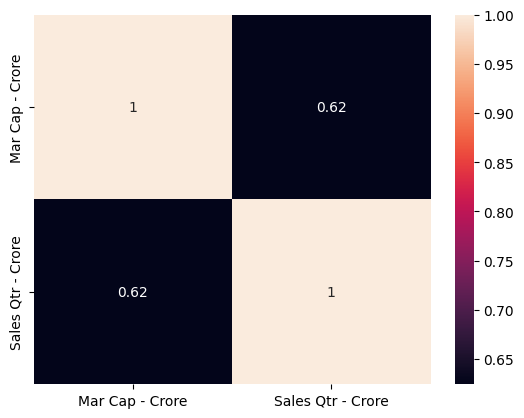

In [13]:
# relationshipe between categorical columns
sns.heatmap(df.corr(numeric_only=True), annot=True)

They a positively correlated. 62%.

In [23]:
# count categories 
market_cap_counts = df['Market_Cap_Category'].value_counts()
sales_qrt_sales = df['Sales_Qrt_Category'].value_counts()

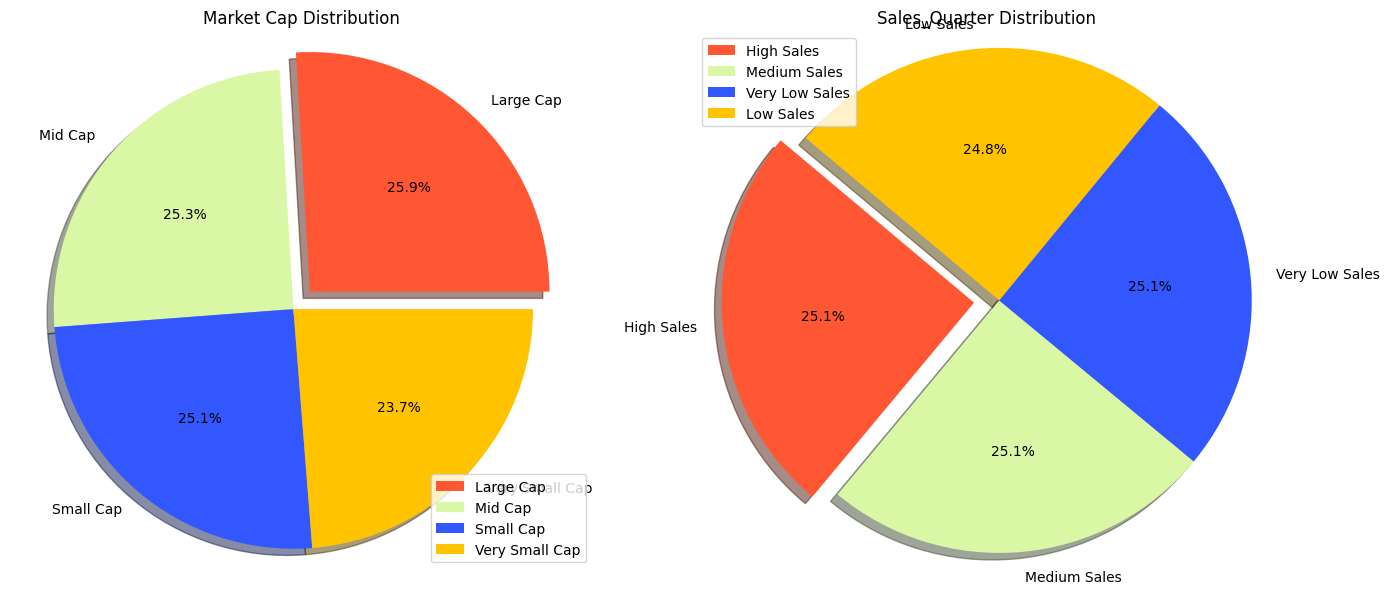

In [28]:
# pie charts for Maket_cap and Sales_Qrt, exploding the the category with the highest number.
# Determine the index of the maximum value for market cap
max_market_cap_index = market_cap_counts.idxmax()
explode_market_cap = [0.1 if category == max_market_cap_index else 0 for category in market_cap_counts.index]

# Determine the index of the maximum value for sales quarter
max_sales_index = sales_qrt_sales.idxmax()
explode_sales = [0.1 if category == max_sales_index else 0 for category in sales_qrt_sales.index]

# Custom color palettes
colors = ['#FF5733', '#DAF7A6', '#3357FF', '#FFC300']  # colors

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Market Cap Pie Chart
axs[0].pie(market_cap_counts, explode=explode_market_cap, labels=market_cap_counts.index,
            colors=colors, autopct='%1.1f%%', shadow=True)
axs[0].set_title('Market Cap Distribution')
axs[0].axis('equal') 
axs[0].legend()

# Sales Quarter Pie Chart
axs[1].pie(sales_qrt_sales, explode=explode_sales, labels=sales_qrt_sales.index,
            colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
axs[1].set_title('Sales_Quarter Distribution')
axs[1].axis('equal')
axs[1].legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

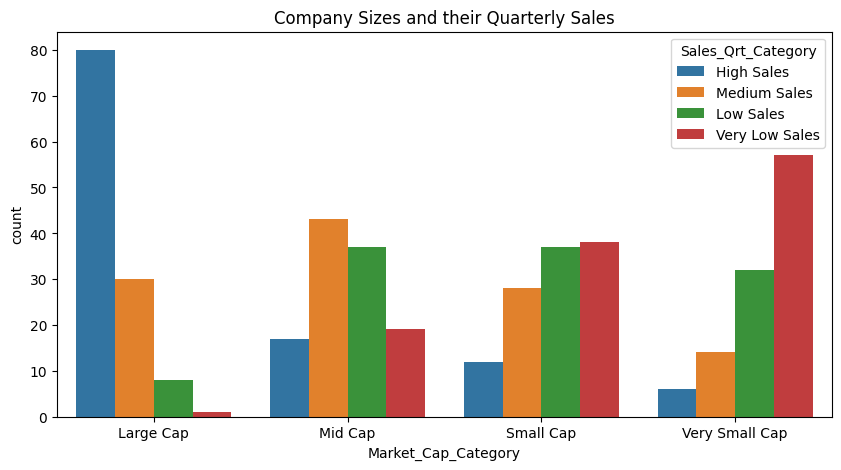

In [34]:
# company sizes with their quartely sales
plt.figure(figsize=(10,5))
sns.countplot(x=df['Market_Cap_Category'], hue=df['Sales_Qrt_Category'])
plt.title("Company Sizes and their Quarterly Sales")
plt.show()